<a href="https://colab.research.google.com/github/TylerSzymkowicz/Speech_DetectionTwitter/blob/main/OffensiveDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,r2_score
import xgboost as xgb
import lightgbm as gbm
import seaborn as sns


In [ ]:
data=pd.read_csv("twitter.csv")
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
classdf=data[['class','tweet']]
classdf.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
tweets=classdf.tweet.to_string()

In [ ]:
tweets = re.sub("[^A-Za-z" "]+"," ", tweets).lower()
tweets = re.sub("[0-9" "]+"," ", tweets)

In [ ]:
class2df=classdf.loc[classdf['class']==2]
class2df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
40,2,""" momma said no pussy cats inside my doghouse """
63,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://..."
66,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo..."
67,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these..."


In [ ]:
offensivedf=classdf.loc[classdf['class']==1]
offensivedf.head()

,class,tweet
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."


In [ ]:
hatedf=classdf.loc[classdf['class']==0]
hatedf.head()

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."


In [ ]:
offensivetweets=offensivedf.tweet.to_string()


In [ ]:
offensivetweets = re.sub("[^A-Za-z" "]+"," ", offensivetweets).lower()
offensivetweets = re.sub("[0-9" "]+"," ", offensivetweets)

In [ ]:
offensivetweets = offensivetweets.split(" ")
#offensivetweets

In [ ]:
hatespeachtweets=hatedf.tweet.to_string()


In [ ]:
hatespeachtweets = re.sub("[^A-Za-z" "]+"," ", hatespeachtweets).lower()
hatespeachtweets = re.sub("[0-9" "]+"," ", hatespeachtweets)

In [ ]:
hatespeachtweets = hatespeachtweets.split(" ")

In [ ]:
#hatespeachtweets

In [ ]:
vectorizer = TfidfVectorizer()
offensive = vectorizer.fit_transform(offensivetweets)

In [ ]:
with open("stop.txt","r") as sw:
    stop_words = sw.read()

In [ ]:
stop_words = stop_words.split("\n")

In [ ]:
stop_words.extend(["rt","a"])

In [ ]:
offensivetweets = [w for w in offensivetweets if not w in stop_words]


In [ ]:
offensivetweets = " ".join(offensivetweets)

In [ ]:

wordcloud_offensive = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(offensivetweets)

In [ ]:
#offensivetweets

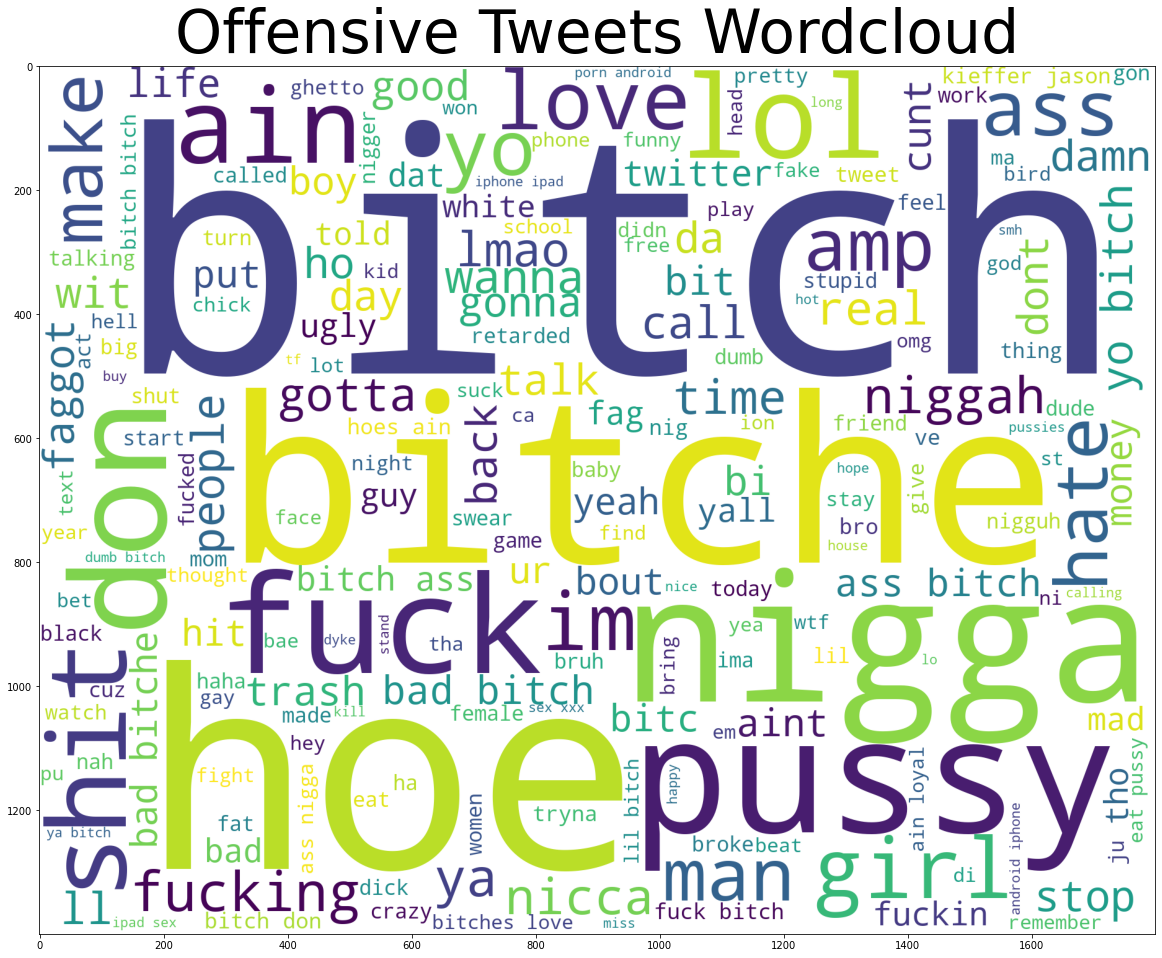

In [ ]:
plt.figure(figsize=(20,20))
plt.title("Offensive Tweets Wordcloud",fontsize=60)
plt.imshow(wordcloud_offensive)

In [ ]:
offensivetweets = offensivetweets.split(" ")

In [ ]:
letter_counts = Counter(offensivetweets)
letter_counts.pop('')


1

In [ ]:
most_offensive = letter_counts.most_common(30)
most_offensive

[('bitch', 4601),
 ('bitches', 1784),
 ('hoes', 1377),
 ('pussy', 1059),
 ('hoe', 1027),
 ('don', 714),
 ('fuck', 696),
 ('ass', 619),
 ('nigga', 524),
 ('ain', 505),
 ('shit', 440),
 ('niggas', 418),
 ('lol', 407),
 ('yo', 406),
 ('love', 364),
 ('bad', 347),
 ('http', 298),
 ('im', 282),
 ('hate', 282),
 ('ya', 240),
 ('fucking', 236),
 ('amp', 231),
 ('man', 222),
 ('good', 206),
 ('real', 204),
 ('make', 197),
 ('girl', 197),
 ('niggah', 178),
 ('wit', 176),
 ('wanna', 173)]

In [ ]:
offensivefreqs=list([i[1] for i in most_offensive])
offensivewords=list([i[0] for i in most_offensive])
offensivefreqs[0:30]

[4601,
 1784,
 1377,
 1059,
 1027,
 714,
 696,
 619,
 524,
 505,
 440,
 418,
 407,
 406,
 364,
 347,
 298,
 282,
 282,
 240,
 236,
 231,
 222,
 206,
 204,
 197,
 197,
 178,
 176,
 173]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


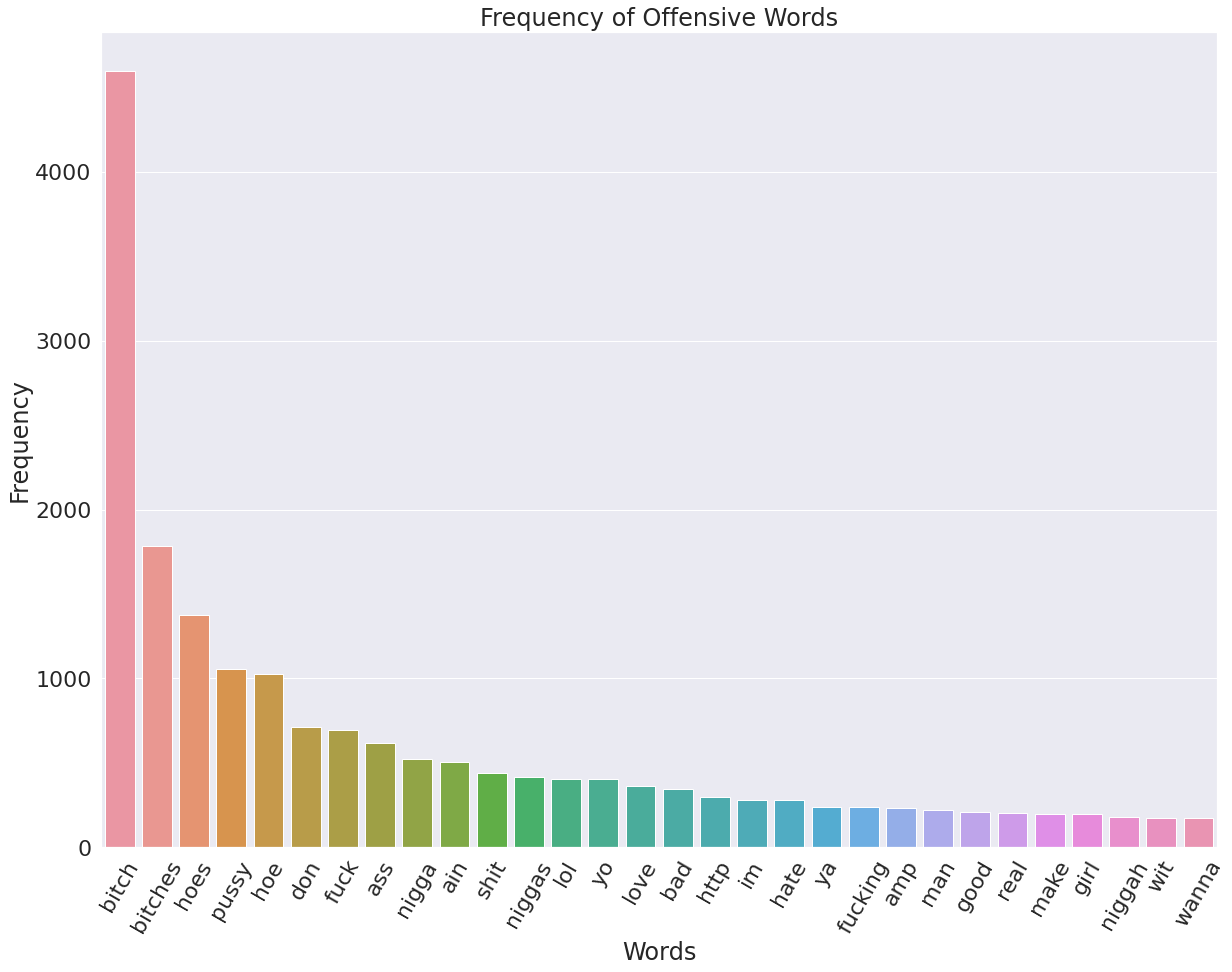

In [ ]:
sns.set(rc = {'figure.figsize':(20,15)}, font_scale = 2)
sns.barplot(offensivewords[0:30],offensivefreqs[0:30])
plt.title("Frequency of Offensive Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
# sns.set(font_scale = 2)
sns.set_palette("Paired", 30)
plt.xticks(list(range(0, 30), ), offensivewords[0:30],rotation=60)
plt.show()

In [ ]:
hatespeachtweets = [w for w in hatespeachtweets if not w in stop_words]

In [ ]:
hatespeachtweets = " ".join(hatespeachtweets)

In [ ]:
wordcloud_hate = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(hatespeachtweets)

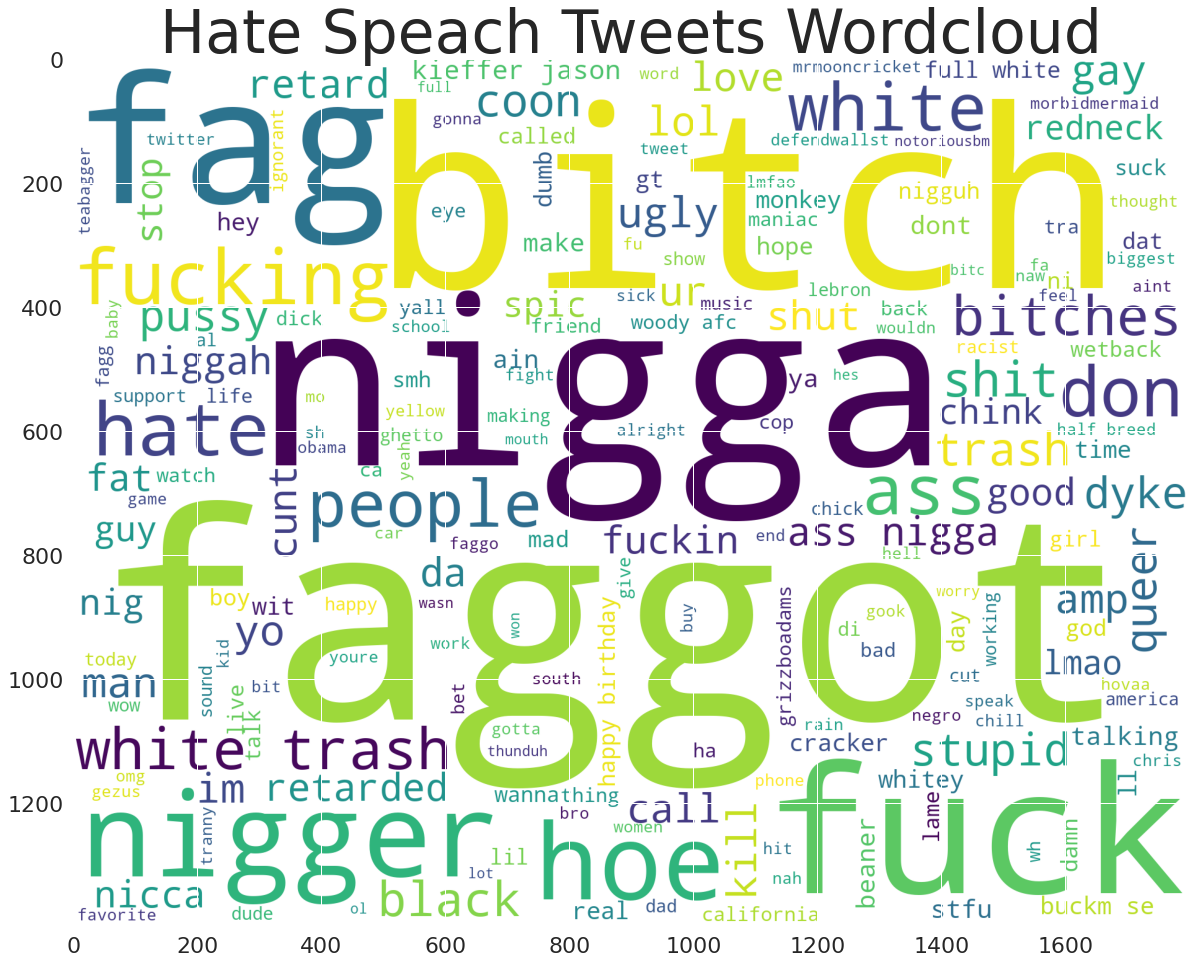

In [ ]:
plt.figure(figsize=(20,20))
plt.title("Hate Speach Tweets Wordcloud",fontsize=60)
plt.imshow(wordcloud_hate)


In [ ]:
offensivetweets = " ".join(offensivetweets)

In [ ]:
both=offensivetweets+hatespeachtweets
#both

In [ ]:
wordcloud_both = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(both)

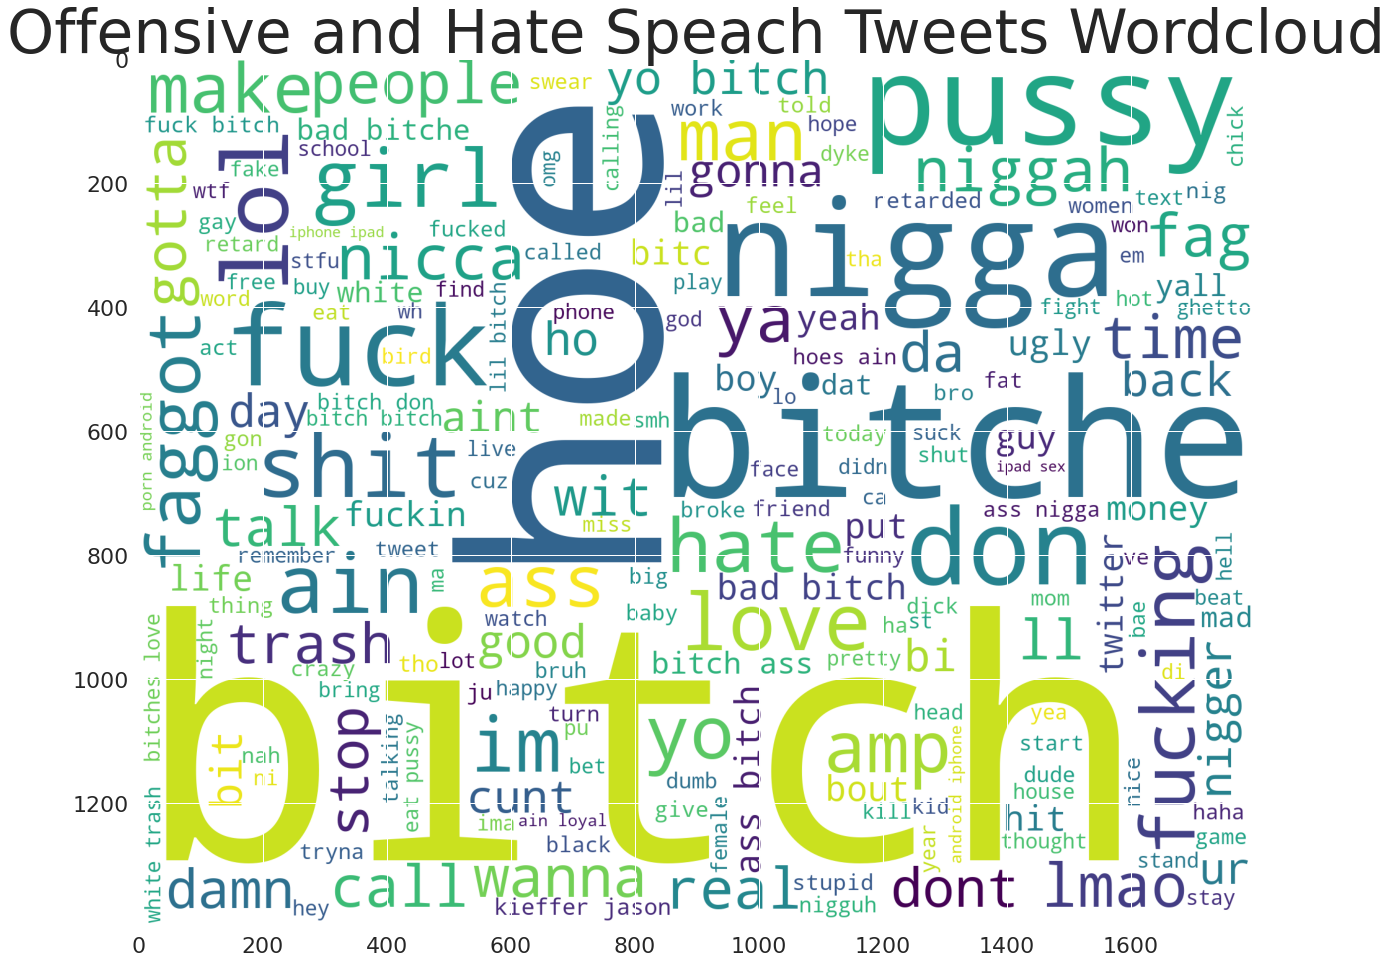

In [ ]:
plt.figure(figsize=(20,20))
plt.title("Offensive and Hate Speach Tweets Wordcloud",fontsize=60)
plt.imshow(wordcloud_both)

In [ ]:
hatespeachtweets = hatespeachtweets.split(" ")

In [ ]:
letter_counts2 = Counter(hatespeachtweets)
letter_counts2.pop('')

2

In [ ]:
most_hate = letter_counts2.most_common(30)
most_hate

[('faggot', 102),
 ('bitch', 98),
 ('white', 75),
 ('fuck', 73),
 ('nigga', 60),
 ('ass', 54),
 ('trash', 54),
 ('fag', 51),
 ('niggas', 50),
 ('nigger', 48),
 ('fucking', 46),
 ('hate', 43),
 ('don', 39),
 ('people', 34),
 ('faggots', 31),
 ('bitches', 30),
 ('hoes', 29),
 ('http', 28),
 ('hoe', 25),
 ('shit', 23),
 ('fags', 22),
 ('black', 21),
 ('niggers', 20),
 ('stupid', 20),
 ('pussy', 19),
 ('man', 18),
 ('ugly', 18),
 ('yo', 18),
 ('gay', 17),
 ('kill', 17)]

In [ ]:
hatefreqs=list([i[1] for i in most_hate])
hatewords=list([i[0] for i in most_hate])
hatefreqs[0:30]

[102,
 98,
 75,
 73,
 60,
 54,
 54,
 51,
 50,
 48,
 46,
 43,
 39,
 34,
 31,
 30,
 29,
 28,
 25,
 23,
 22,
 21,
 20,
 20,
 19,
 18,
 18,
 18,
 17,
 17]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


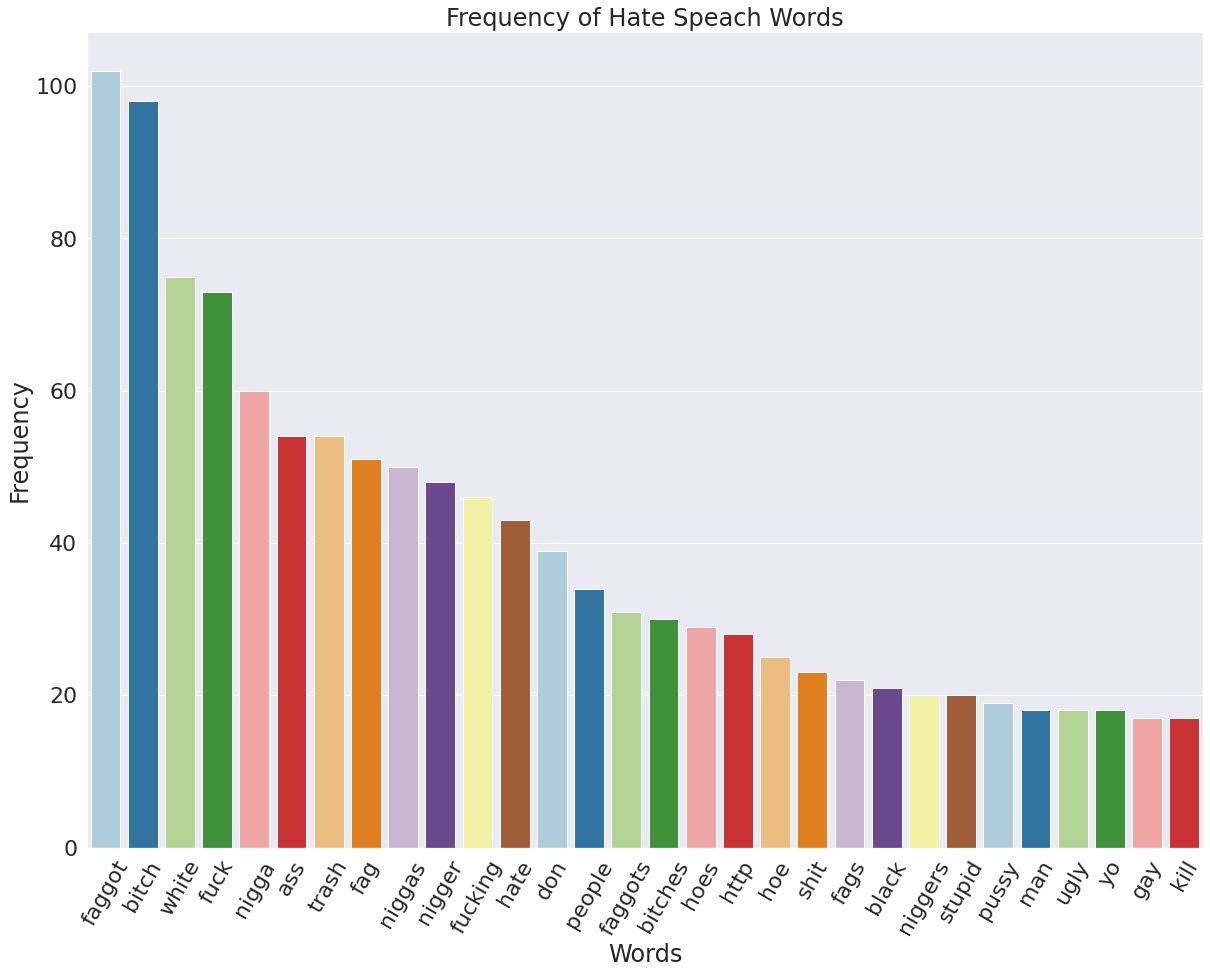

In [ ]:
sns.barplot(hatewords[0:30],hatefreqs[0:30])
plt.title("Frequency of Hate Speach Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
sns.set(rc = {'figure.figsize':(20,15)}, font_scale = 2)
# sns.set(font_scale = 2)
sns.set_palette("Paired", 30)
plt.xticks(list(range(0, 30), ), hatewords[0:30],rotation=60)
plt.show()

In [ ]:
def countOccurrences(str, word, listword):
     
    # split the string by spaces in a
    a = str.split(" ")
    # search for pattern in a
    count = 0
    # for i in range(1000):
    for i in range(0, len(a)):
        
        # if match found increase count
        # print(a[i])
      if (word == a[i]):
          count = count + 1
    if count > 0:
      listword.append(1)
    else:
      listword.append(0)
            
    return count, listword

In [ ]:
bitch = []
# for i in range(12):
for i in range(24783):
  count, bitch = countOccurrences(classdf.tweet[i],"bitch", bitch)
  

In [ ]:
bitches = []
# for i in range(12):
for i in range(24783):
  count, bitches = countOccurrences(classdf.tweet[i],"bitches", bitches)
  

In [ ]:
hoes = []
# for i in range(12):
for i in range(24783):
  count, hoes = countOccurrences(classdf.tweet[i],"hoes", hoes)
  

In [ ]:
pussy = []
# for i in range(12):
for i in range(24783):
  count, pussy = countOccurrences(classdf.tweet[i],"pussy", pussy)
  

In [ ]:
hoe = []
# for i in range(12):
for i in range(24783):
  count, hoe = countOccurrences(classdf.tweet[i],"hoe", hoe)
  

In [ ]:
fuck = []
# for i in range(12):
for i in range(24783):
  count, fuck = countOccurrences(classdf.tweet[i],"fuck", fuck)
  

In [ ]:
ass = []
# for i in range(12):
for i in range(24783):
  count, ass = countOccurrences(classdf.tweet[i],"ass", ass)

In [ ]:
niggah = []
# for i in range(12):
for i in range(24783):
  count, niggah = countOccurrences(classdf.tweet[i],"niggah", niggah)

In [ ]:
nigga = []
# for i in range(12):
for i in range(24783):
  count, nigga = countOccurrences(classdf.tweet[i],"nigga", nigga)

In [ ]:
shit = []
# for i in range(12):
for i in range(24783):
  count, shit = countOccurrences(classdf.tweet[i],"shit", shit)

In [ ]:
niggas = []
# for i in range(12):
for i in range(24783):
  count, niggas = countOccurrences(classdf.tweet[i],"niggas", niggas)

In [ ]:
nigger = []
# for i in range(12):
for i in range(24783):
  count, nigger = countOccurrences(classdf.tweet[i],"nigger", nigger)

In [ ]:
gay = []
# for i in range(12):
for i in range(24783):
  count, gay = countOccurrences(classdf.tweet[i],"gay", gay)

In [ ]:
ugly = []
# for i in range(12):
for i in range(24783):
  count, ugly = countOccurrences(classdf.tweet[i],"ugly", ugly)

In [ ]:
#create a new dataframe counting each frequent word for each tweet(row)
#most frequent word= column

In [ ]:
encodedDf = pd.DataFrame(bitch)

In [ ]:
encodedDf

,0
0,0
1,0
2,1
3,0
4,1
...,...
24778,0
24779,0
24780,0
24781,0


In [ ]:
encodedDf.rename(columns = {0:"Bitch"},inplace=True)

In [ ]:
encodedDf["Bitches"] = bitches

In [ ]:
encodedDf["Hoes"] = hoes

In [ ]:
encodedDf["Pussy"] = pussy

In [ ]:
encodedDf["Hoe"] = hoe

In [ ]:
encodedDf["Fuck"] = fuck

In [ ]:
encodedDf["Ass"] = ass

In [ ]:
encodedDf["Nigga"] = nigga

In [ ]:
encodedDf["Shit"] = shit

In [ ]:
encodedDf["Niggas"] = niggas

In [ ]:
encodedDf["Nigger"] = nigger

In [ ]:
#encodedDf["Niggah"] = niggah

In [ ]:
encodedDf["Gay"] = gay

In [ ]:
encodedDf["Ugly"] = ugly

In [ ]:
encodedDf

,Bitch,Bitches,Hoes,Pussy,Hoe,Fuck,Ass,Nigga,Shit,Niggas,Nigger,Gay,Ugly
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,0,0,0,0,0,0,0,0,0,0,0,0,0
24779,0,0,0,0,0,0,0,0,0,0,0,0,0
24780,0,0,0,0,0,0,0,0,0,0,0,0,0
24781,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
faggot = []
for i in range(24783):
  count, faggot = countOccurrences(classdf.tweet[i],"faggot", faggot)
  

In [ ]:
bitch = []
for i in range(24783):
  count, bitch = countOccurrences(classdf.tweet[i],"bitch", bitch)

In [ ]:
fuck = []
for i in range(24783):
  count, fuck = countOccurrences(classdf.tweet[i],"fuck", fuck)

In [ ]:
nigga = []
for i in range(24783):
  count, nigga = countOccurrences(classdf.tweet[i],"nigga", nigga)

In [ ]:
ass = []
for i in range(24783):
  count, ass = countOccurrences(classdf.tweet[i],"ass", ass)

In [ ]:
fag = []
for i in range(24783):
  count, fag = countOccurrences(classdf.tweet[i],"fag", fag)

In [ ]:
niggas = []
for i in range(24783):
  count, niggas = countOccurrences(classdf.tweet[i],"niggas", niggas)

In [ ]:
fucking = []
for i in range(24783):
  count, fucking = countOccurrences(classdf.tweet[i],"fucking", fucking)

In [ ]:
faggots = []
for i in range(24783):
  count, faggots = countOccurrences(classdf.tweet[i],"faggots", faggots)

In [ ]:
white = []
for i in range(24783):
  count, white = countOccurrences(classdf.tweet[i],"white", white)

In [ ]:
trash = []
for i in range(24783):
  count, trash = countOccurrences(classdf.tweet[i],"trash", trash)

In [ ]:
love = []
for i in range(24783):
  count, love = countOccurrences(classdf.tweet[i],"love", love)

In [ ]:
real = []
for i in range(24783):
  count, real = countOccurrences(classdf.tweet[i],"real", real)

In [ ]:
good = []
for i in range(24783):
  count, good = countOccurrences(classdf.tweet[i],"good", good)

In [ ]:
black = []
for i in range(24783):
  count, black = countOccurrences(classdf.tweet[i],"black", black)

In [ ]:

encodedHateDF = pd.DataFrame(faggot)

In [ ]:
encodedHateDF

,0
0,0
1,0
2,0
3,0
4,0
...,...
24778,0
24779,0
24780,0
24781,0


In [ ]:
encodedHateDF.rename(columns = {0: "Faggot"}, inplace = True)

In [ ]:
#encodedHateDF["Bitch"] = bitch

In [ ]:
#encodedHateDF["Fuck"] = fuck

In [ ]:
#encodedHateDF["Nigga"] = nigga

In [ ]:
#encodedHateDF["Ass"] = ass

In [ ]:
encodedHateDF["Fag"] = fag

In [ ]:
#encodedHateDF["Niggas"] = niggas

In [ ]:
encodedHateDF["Fucking"] = fucking

In [ ]:
encodedHateDF["Faggots"] = faggots

In [ ]:
encodedHateDF["White"] = white

In [ ]:
encodedHateDF["Trash"] = trash

In [ ]:
encodedHateDF["Love"] = love

In [ ]:
encodedHateDF["Real"] = real

In [ ]:
encodedHateDF["Good"] = good

In [ ]:
encodedHateDF["Black"] = black

In [ ]:
encodedHateDF

,Faggot,Fag,Fucking,Faggots,White,Trash,Love,Real,Good,Black
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
24778,0,0,0,0,0,1,0,0,0,0
24779,0,0,0,0,0,0,0,0,0,0
24780,0,0,0,0,0,0,0,0,0,0
24781,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordDF = pd.merge(encodedDf, encodedHateDF, left_index=True, right_index=True)

In [ ]:
wordDF.head()

,Bitch,Bitches,Hoes,Pussy,Hoe,Fuck,Ass,Nigga,Shit,Niggas,...,Faggot,Fag,Fucking,Faggots,White,Trash,Love,Real,Good,Black
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
target = classdf["class"]

In [ ]:
sm = SMOTE()
X,Y = sm.fit_resample(wordDF,target)

In [ ]:
x_train,x_test,x_target_train,x_target_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=14)

In [ ]:
#rfc=RandomForestClassifier(n_estimators= 250, max_depth=100)
#dtc=DecisionTreeClassifier()
#lr=LogisticRegression(max_iter=600)
#knnc=KNeighborsClassifier()
#svc=SVC()
#nb=GaussianNB()

In [ ]:
#models = [("rfc",rfc),("dtc",dtc),("lr",lr),("knnc",knnc),("svc",svc),("nb",nb)]

In [ ]:
#voting = VotingClassifier(models)

In [ ]:
#voting.fit(x_train,x_target_train)

In [ ]:
#x_pred = voting.predict(x_test)

In [ ]:
#accuracy_score(x_target_test,x_pred)

In [ ]:
#model = xgb.XGBClassifier()
#model.fit(x_train,x_target_train)

In [ ]:
#x_pred = model.predict(x_test)

In [ ]:
#accuracy_score(x_target_test,x_pred)

In [ ]:
model = gbm.LGBMClassifier()

In [ ]:
model.fit(x_train,x_target_train)

LGBMClassifier()

In [ ]:
x_pred = model.predict(x_test)

In [ ]:
accuracy_score(x_target_test,x_pred)

0.7003647733194373

In [ ]:
x_test

,Bitch,Bitches,Hoes,Pussy,Hoe,Fuck,Ass,Nigga,Shit,Niggas,...,Faggot,Fag,Fucking,Faggots,White,Trash,Love,Real,Good,Black
24133,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26685,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
37548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12631,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6632,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
example=input()

pussy fuck ass trash shit


In [ ]:
user_inp_df={}
for i in wordDF.columns:
  word=[]
  count,word=countOccurrences(example,i.lower(),word)
  user_inp_df[i]=word
  #print(word)

user_inp_df

{'Ass': [1],
 'Bitch': [0],
 'Bitches': [0],
 'Black': [0],
 'Fag': [0],
 'Faggot': [0],
 'Faggots': [0],
 'Fuck': [1],
 'Fucking': [0],
 'Gay': [0],
 'Good': [0],
 'Hoe': [0],
 'Hoes': [0],
 'Love': [0],
 'Nigga': [0],
 'Niggas': [0],
 'Nigger': [0],
 'Pussy': [1],
 'Real': [0],
 'Shit': [1],
 'Trash': [1],
 'Ugly': [0],
 'White': [0]}

In [ ]:
new_user_df=pd.DataFrame.from_dict(user_inp_df)
new_user_df.head()

,Bitch,Bitches,Hoes,Pussy,Hoe,Fuck,Ass,Nigga,Shit,Niggas,...,Faggot,Fag,Fucking,Faggots,White,Trash,Love,Real,Good,Black
0,0,0,0,1,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
prediction=model.predict(new_user_df)

In [ ]:
prediction

array([1])